# Qiskitの基本操作の確認

## 参照元
* https://qiskit.org/documentation/locale/ja_JP/intro_tutorial1.html

### 注意点
* QuantumCircuit(num-of-Qubit, num-of-Classicalbit)
* 測定を行う場合は対応する古典ビットに射影するため２つ目の引数が必要。

## ベル状態の作成

In [13]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 495, '00': 505}


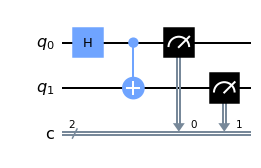

In [17]:
# 回路の可視化
circuit.draw('mpl')

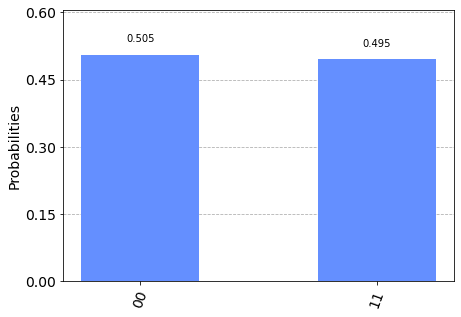

In [18]:
# 実行結果の可視化
plot_histogram(counts)

## ブロッホ球の可視化

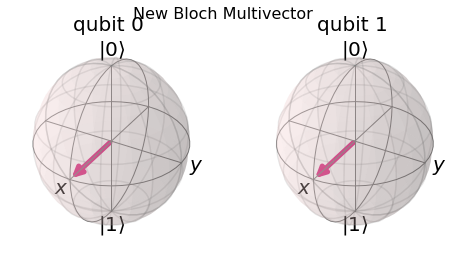

In [22]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

#qc.draw('mpl')

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state, title="New Bloch Multivector")